In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

In [6]:
df = pd.read_csv('/Users/shravaninomulwar/Desktop/abc/dataset/ecg_autoencoder_dataset.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [9]:
#X = df.iloc[:,:-1].values
#y = df.iloc[:,-1].values
X = df.drop(140, axis=1).values
y = df[140].values


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=42)
x_train_normal = x_train[y_train==0]
x_test_normal = x_test[y_test==0]
x_test_anomaly = x_test[y_test==1]

In [13]:
input_dim = x_train.shape[1]

In [15]:
print(input_dim)

140


In [17]:
bottleneck = 70

input_layer = Input(shape=(input_dim,))

encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(bottleneck, activation='relu')(encoder)

decoder = Dense(128, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(input_layer, decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(x_train_normal, x_train_normal, epochs=20, validation_split=0.1)



Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6416 - val_loss: 0.1403
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.1244 - val_loss: 0.0760
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.0731 - val_loss: 0.0504
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0521 - val_loss: 0.0372
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.0379 - val_loss: 0.0297
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0300 - val_loss: 0.0264
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0243 - val_loss: 0.0239
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218 - val_loss: 0.0221
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0186 - val_loss: 0.0203
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.0155 - val_loss: 0.0194
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0149 - val_loss: 0.0182
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

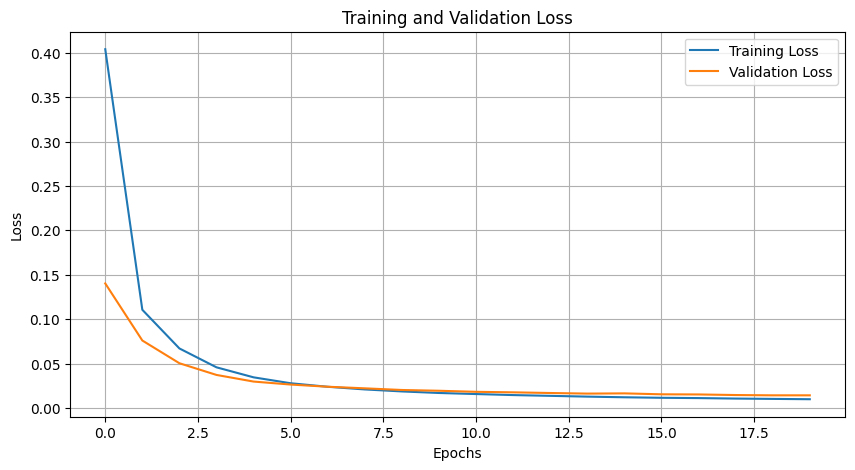

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import numpy as np
recon = autoencoder.predict(X)
mse = np.mean((X - recon)**2, axis=1)
threshold = np.percentile(mse[y==0], 95)
y_pred = np.where(mse > threshold, 1, 0)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step


In [25]:
num_anomalies = np.sum(y_pred == 1)
num_normals = np.sum(y_pred == 0)

print(f"abnormal_errors: {num_anomalies}")
print(f"normal_errors normal samples: {num_normals}")

print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n")
print(classification_report(y, y_pred, target_names=["Normal", "Fraud"]))

abnormal_errors: 2697
normal_errors normal samples: 2301
Confusion Matrix:
 [[1975  104]
 [ 326 2593]]

Classification Report:

              precision    recall  f1-score   support

      Normal       0.86      0.95      0.90      2079
       Fraud       0.96      0.89      0.92      2919

    accuracy                           0.91      4998
   macro avg       0.91      0.92      0.91      4998
weighted avg       0.92      0.91      0.91      4998

